In [1]:
# import modules
import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('daily_gold_rate.csv')
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [3]:
# delete rows with date < 01/01/2000
df = df[df['Date'] >= '2000-01-01']
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
3914,2000-01-03,290.25,285.88,178.76,12624.42,1066.06,2403.21
3915,2000-01-04,281.50,273.25,172.12,12253.35,1033.98,2330.79
3916,2000-01-05,280.45,271.31,171.09,12204.48,1030.09,2322.07
3917,2000-01-06,279.40,269.98,169.56,12155.57,1026.21,2313.35
3918,2000-01-07,282.10,274.18,172.22,12275.58,1036.21,2335.62


In [4]:
df.tail()

,Date,USD,EUR,GBP,INR,AED,CNY
9709,2022-03-21,1935.05,1751.26,1465.45,147315.36,7107.54,12306.53
9710,2022-03-22,1915.25,1737.66,1444.44,145908.53,7034.81,12181.47
9711,2022-03-23,1931.75,1755.90,1462.12,147397.35,7095.41,12313.55
9712,2022-03-24,1965.20,1785.33,1490.59,150084.78,7218.28,12517.05
9713,2022-03-25,1953.80,1778.69,1480.94,148901.54,7176.41,12438.18


In [5]:
# describe the data
df.describe()


,USD,EUR,GBP,INR,AED,CNY
count,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,1020.774603,839.019105,685.934717,60099.339910,3749.287169,6929.624469
std,511.512089,418.726968,388.590303,37945.930796,1878.842844,3089.769807
min,255.950000,269.980000,169.560000,11936.120000,940.100000,2118.650000
25%,440.937500,354.940000,242.222500,19420.557500,1619.430000,3632.110000
50%,1175.750000,954.715000,755.065000,63160.545000,4318.530000,7482.020000
75%,1349.275000,1134.735000,987.647500,85586.457500,4955.917500,8861.470000
max,2067.150000,1874.560000,1572.810000,156815.690000,7592.950000,14355.530000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800 entries, 3914 to 9713
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5800 non-null   object 
 1   USD     5800 non-null   float64
 2   EUR     5800 non-null   float64
 3   GBP     5800 non-null   float64
 4   INR     5800 non-null   float64
 5   AED     5800 non-null   float64
 6   CNY     5800 non-null   float64
dtypes: float64(6), object(1)
memory usage: 362.5+ KB


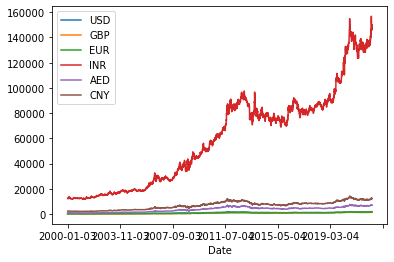

In [7]:
# plot line graph of date against all columns
df.plot(x='Date', y=['USD', 'GBP', 'EUR', 'INR', 'AED','CNY'])
plt.show()


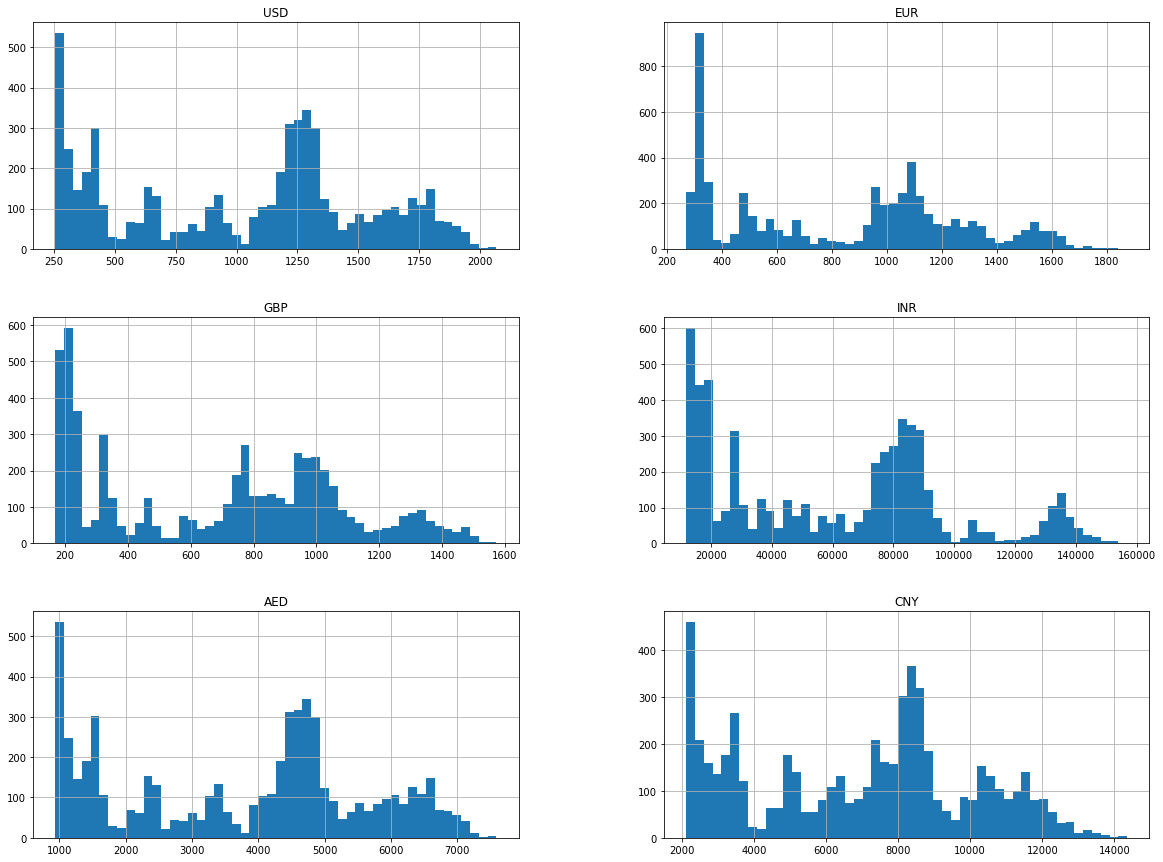

In [8]:
# histogram of all columns
df.hist(bins=50, figsize=(20,15))
plt.show()


In [9]:
# clean data
df.dropna(inplace=True)

# convert date to datetime
df.Date = pd.to_datetime(df.Date)
# int too big to convert date to float
df.Date = df.Date.astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800 entries, 3914 to 9713
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5800 non-null   int64  
 1   USD     5800 non-null   float64
 2   EUR     5800 non-null   float64
 3   GBP     5800 non-null   float64
 4   INR     5800 non-null   float64
 5   AED     5800 non-null   float64
 6   CNY     5800 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 362.5 KB


In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['USD', 'GBP', 'EUR', 'INR', 'AED','CNY']], df['Date'], test_size=0.2, random_state=42)

# train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:

# predict
y_pred = model.predict(X_test)


In [23]:
# show results in a dataframe
df_results = pd.DataFrame({'Date': y_test, 'Actual': y_test, 'Predicted': y_pred})
df_results.head()

,Date,Actual,Predicted
9326,1601424000000000000,1601424000000000000,1.602597e+18
5017,1080172800000000000,1080172800000000000,1.086827e+18
4726,1045008000000000000,1045008000000000000,1.043601e+18
5546,1144195200000000000,1144195200000000000,1.144747e+18
5042,1083196800000000000,1083196800000000000,1.084482e+18


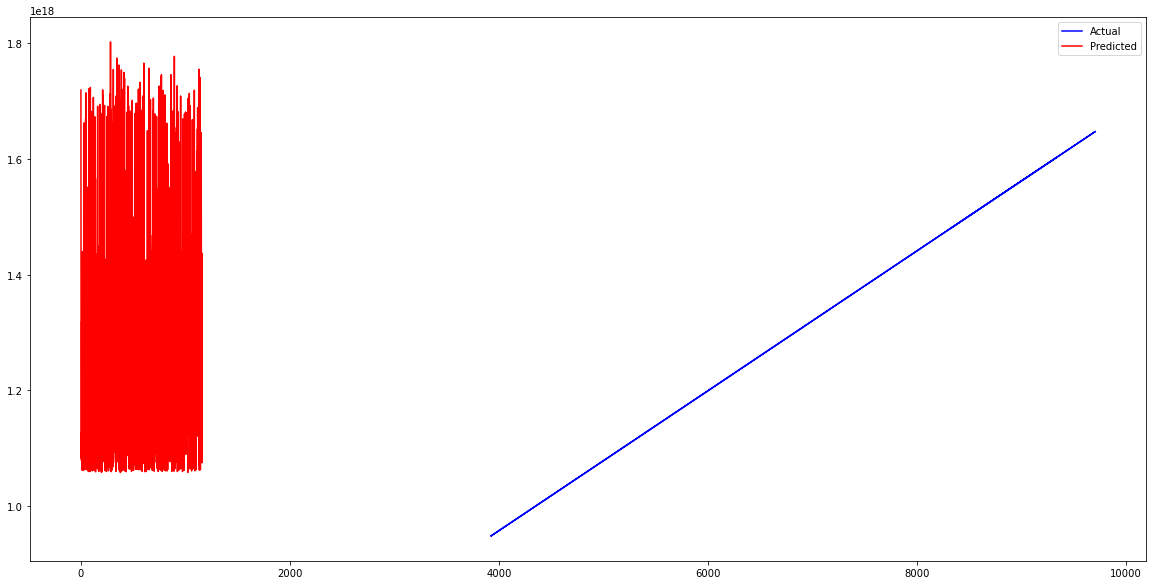

In [12]:
# plot
plt.figure(figsize=(20,10))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.legend()
plt.show()


In [13]:
# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

# save model
import pickle
pickle.dump(model, open('model.pkl','wb'))


5.986468999036393e+16


In [14]:
# get accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Classification metrics can't handle a mix of multiclass and continuous targets
# so we need to convert the target to a binary class
y_test_binary = y_test.copy()
y_test_binary[y_test_binary > 0] = 1
y_pred_binary = y_pred.copy()
y_pred_binary[y_pred_binary > 0] = 1

# accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(accuracy)



1.0


### Using Random Forest to Predict the Gold Price

In [15]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['USD', 'GBP', 'EUR', 'INR', 'AED','CNY']], df['Date'], test_size=0.2, random_state=42)



In [16]:

# use another rl model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:

# predict
y_pred = model.predict(X_test)

In [24]:
# showing results in a dataframe
df_results = pd.DataFrame({'Date': y_test, 'Actual': y_test, 'Predicted': y_pred})
df_results.head()

,Date,Actual,Predicted
9326,1601424000000000000,1601424000000000000,1.602597e+18
5017,1080172800000000000,1080172800000000000,1.086827e+18
4726,1045008000000000000,1045008000000000000,1.043601e+18
5546,1144195200000000000,1144195200000000000,1.144747e+18
5042,1083196800000000000,1083196800000000000,1.084482e+18


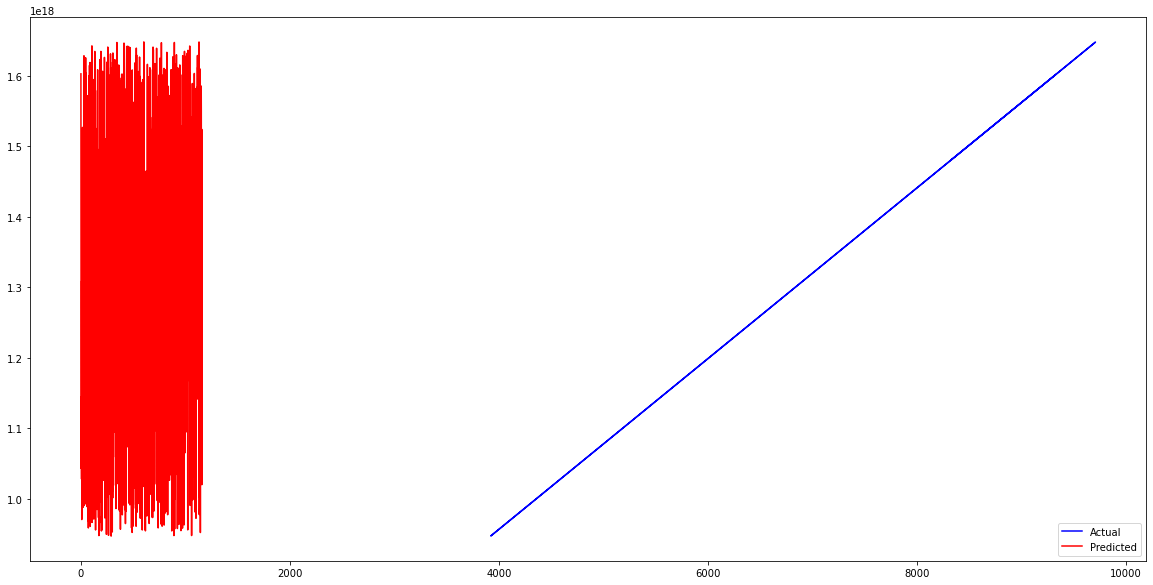

In [18]:

# plot
plt.figure(figsize=(20,10))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

In [19]:
# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

7652879207130566.0


In [20]:

# save model
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [21]:

# get accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Classification metrics can't handle a mix of multiclass and continuous targets
# so we need to convert the target to a binary class
y_test_binary = y_test.copy()
y_test_binary[y_test_binary > 0] = 1
y_pred_binary = y_pred.copy()
y_pred_binary[y_pred_binary > 0] = 1

In [22]:
# accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(accuracy)

1.0
